In [1]:
# Importing all necessaary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset from excel file

excelfile=pd.ExcelFile("TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx")

df_left=pd.read_excel(excelfile,'Employees who have left')  # Sheet 2
df_notleft=pd.read_excel(excelfile,'Existing employees')    # Sheet 3

## Data Understanding

In [3]:
df_left.tail()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
3566,14995,0.40,0.57,2,151,3,0,0,support,low
3567,14996,0.37,0.48,2,160,3,0,0,support,low
3568,14997,0.37,0.53,2,143,3,0,0,support,low
3569,14998,0.11,0.96,6,280,4,0,0,support,low
3570,14999,0.37,0.52,2,158,3,0,0,support,low


In [4]:
df_notleft.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [5]:
df_left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 10 columns):
Emp ID                   3571 non-null int64
satisfaction_level       3571 non-null float64
last_evaluation          3571 non-null float64
number_project           3571 non-null int64
average_montly_hours     3571 non-null int64
time_spend_company       3571 non-null int64
Work_accident            3571 non-null int64
promotion_last_5years    3571 non-null int64
dept                     3571 non-null object
salary                   3571 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 279.1+ KB


In [6]:
df_left.dept.value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: dept, dtype: int64

In [7]:
# Combining the IT, support and Technical in one value as Technical

df_left['dept']=np.where(df_left['dept']=='support','technical',df_left['dept']).astype('str')
df_left['dept']=np.where(df_left['dept']=='IT','technical',df_left['dept']).astype('str')
df_notleft['dept']=np.where(df_notleft['dept']=='support','technical',df_notleft['dept']).astype('str')
df_notleft['dept']=np.where(df_notleft['dept']=='IT','technical',df_notleft['dept']).astype('str')



## Data Visualization

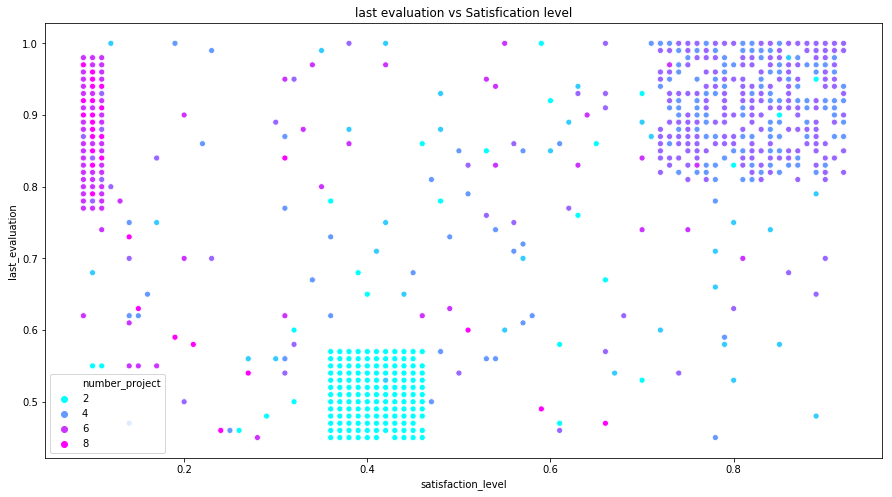

In [8]:

plt.figure(figsize=(15,8))
plt.title("last evaluation vs Satisfication level")
sns.scatterplot(x=df_left['satisfaction_level'],y=df_left['last_evaluation'],hue='number_project',data=df_left, palette='cool')
plt.show()

Point drawn from above plot:
   - Satisfcation level is very low for employees who has number of projects more than 4
   - Last evaluation for employees having number of projects 2 is low, also they have low satification level. 

**Now, why they have low satisfaction level - we will know in the upcoming plots**

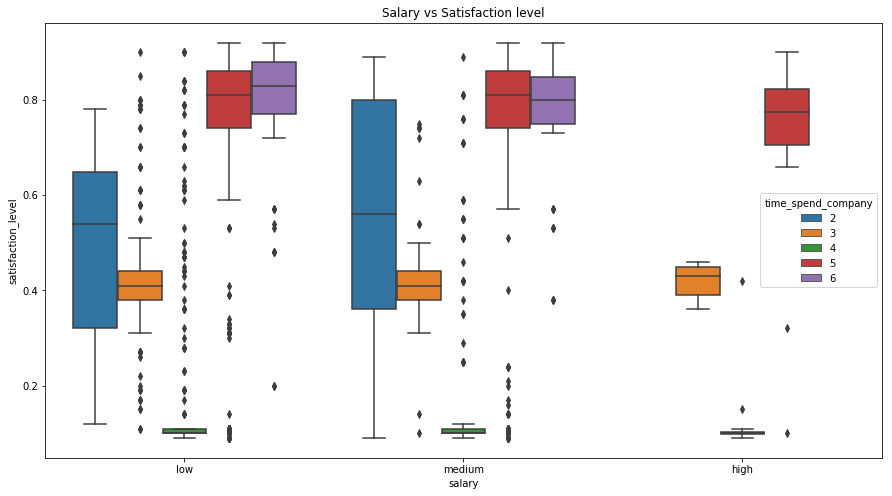

In [9]:

plt.figure(figsize=(15,8))
plt.title('Salary vs Satisfaction level')
sns.boxplot(x=df_left['salary'],y=df_left['satisfaction_level'],hue='time_spend_company',data=df_left)
plt.show()

Point drawn from above plot:
   - Satisfcation level is very low for employees who spent time in the company equal to 4 for all levels of salary.
   - For low salary employees, most of the employees belong to the 2nd quartile with less satisfaction levels as we can see the median is shifted to the upper quartile.
   - We can see there are so many oultiers from each salary levels.
   - The box plot is bigger for meduim salary emplyoees who spent time in the company is equal to 2, 50% of these employees have low satifaction levels.

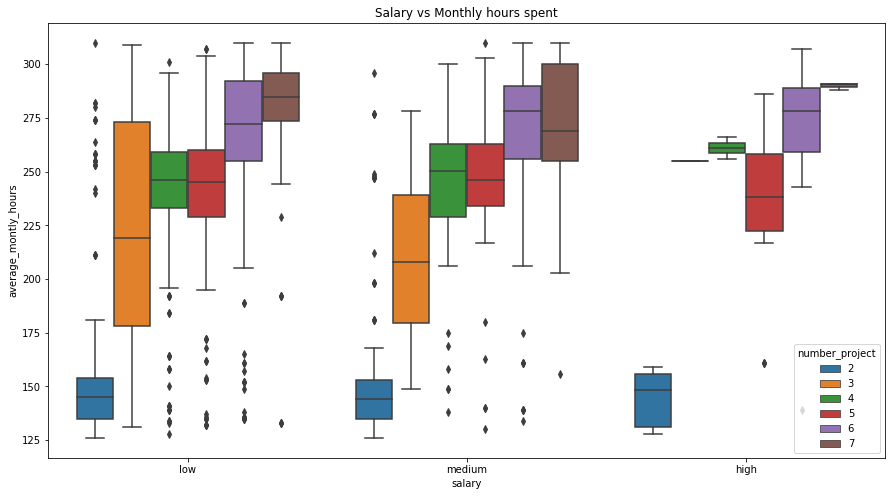

In [10]:

plt.figure(figsize=(15,8))
plt.title("Salary vs Monthly hours spent")
sns.boxplot(x=df_left['salary'],y=df_left['average_montly_hours'],hue='number_project',data=df_left)
plt.show()

Point drawn from above plot:
   - Avereage monlthy hours is very low for employees who has number of projects equal to 2 for all levels of salary.
   - As we can see from the plot the employees from all levels for salary are loaded with projets and monthly hours is high.
   - We can see there are so many oultiers from low and meduim salary levels.
   - The box plot is bigger for low salary emplyoees who has number of projects equal to 3, 50% of these employees high monthly hours.

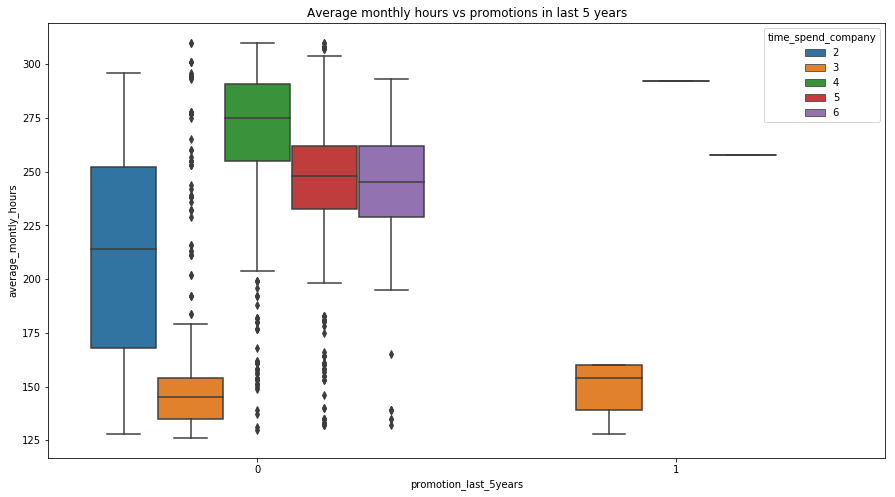

In [11]:

plt.figure(figsize=(15,8))
plt.title("Average monthly hours vs promotions in last 5 years")
sns.boxplot(x=df_left['promotion_last_5years'],y=df_left['average_montly_hours'],hue='time_spend_company',data=df_left)
plt.show()

Intersting points we can draw from above plot-
  - Employees who got promotion in last 5 years have less average monthly hours, that to who has spend exactly 3 years in the company.
  - Very few employees from higher duration time spend in the comapny got promotion.
  - The employees who has not got the promotion are having higher avrage monthly hours and mostly time spend in the comapny is more than or equal 4 years with few outliers.

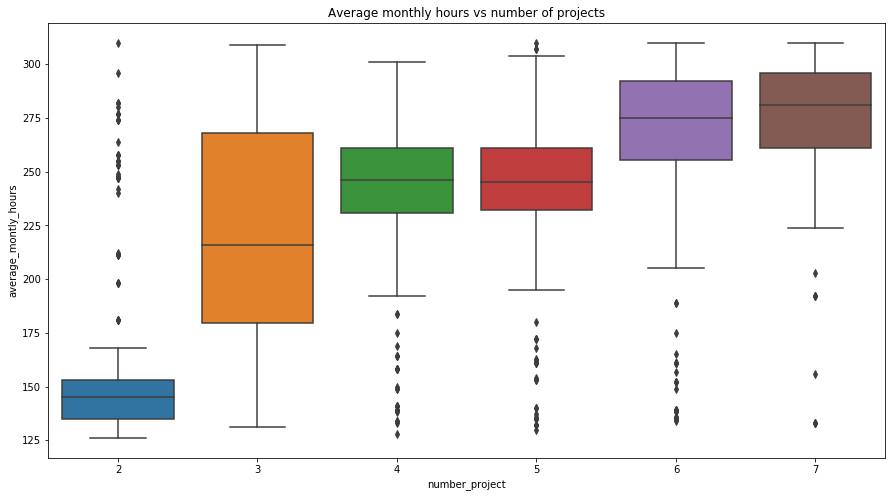

In [12]:

plt.figure(figsize=(15,8))
plt.title('Average monthly hours vs number of projects')
sns.boxplot(x=df_left['number_project'],y=df_left['average_montly_hours'],data=df_left)
plt.show()

**From the above plot, As the number of projects goes higher average monthly hours goes high as well. Most fo the employees belong to the project number equal to 3 as it has bigger boxplot than others**

<Figure size 1080x720 with 0 Axes>

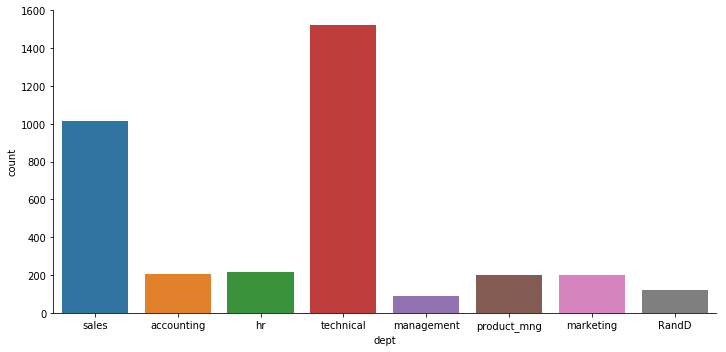

In [13]:

plt.figure(figsize=(15,10))
sns.catplot('dept',data=df_left,kind='count',aspect=2)
plt.show()

**Most of the employees leaving the company belongs to Sales and Technical departments**

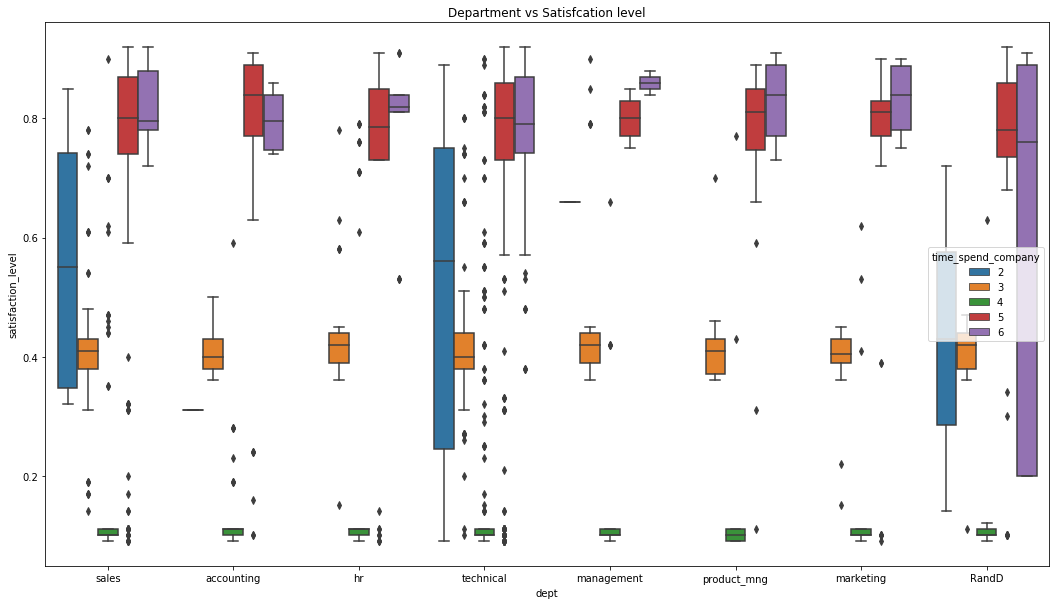

In [14]:

plt.figure(figsize=(18,10))
plt.title("Department vs Satisfcation level")
sns.boxplot(x=df_left['dept'],y=df_left['satisfaction_level'],hue='time_spend_company',data=df_left)
plt.show()

Intersting points we can draw from above plot-
  - Employees from R&D department having 6 years of time spend having large distribution of satisfaction levels. 
  - Time spend equal to 4 in all departments are having same level of very low satisfaction levels same goes for time spend equals to 3 having same level of average satisfcations in all departments.
  - Employees from sales and Technical department of 2 yeras of time spend is also having larger distributions of satisfaction levels as expected. 

### So, ultimateley we found the reason why employees were leaving and which types of employees are leaving.
 - Employees who are stressed up working more hours and having higher number of projects.
 - Mostly from sales and technical department were leaving the company.
 - And, the employees are not getting promotion even they are working tirelessly.

**Now lets try to find out which employees are prone to leave the company**

## Data Transformation

In [15]:
# Adding both dataset from employees who left with existing employees

df_left['Left']=1

df_notleft['Left']=0

final_df=pd.concat([df_left,df_notleft],axis=0)

In [16]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 11427
Data columns (total 11 columns):
Emp ID                   14999 non-null int64
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
Left                     14999 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.4+ MB


In [17]:
# Creating dummies

columns=['dept','salary']

dummies=pd.get_dummies(final_df[columns],drop_first=True)

final_df=pd.concat([final_df,dummies],axis=1)

In [18]:
final_df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Left,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_technical,salary_low,salary_medium
0,1,0.38,0.53,2,157,3,0,0,sales,low,1,0,0,0,0,0,1,0,1,0
1,2,0.80,0.86,5,262,6,0,0,sales,medium,1,0,0,0,0,0,1,0,0,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,1,0,0,0,0,0,1,0,0,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,1,0,0,0,0,0,1,0,1,0
4,5,0.37,0.52,2,159,3,0,0,sales,low,1,0,0,0,0,0,1,0,1,0


In [19]:
final_df=final_df.drop(columns,axis=1)  # Dropping uncessary columns

In [20]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 11427
Data columns (total 18 columns):
Emp ID                   14999 non-null int64
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
Left                     14999 non-null int64
dept_accounting          14999 non-null uint8
dept_hr                  14999 non-null uint8
dept_management          14999 non-null uint8
dept_marketing           14999 non-null uint8
dept_product_mng         14999 non-null uint8
dept_sales               14999 non-null uint8
dept_technical           14999 non-null uint8
salary_low               14999 non-null uint8
salary_medium            14999 non-null uint8
dtypes: float64(2), int64(7), uint8(9)
memory usage: 1.3 MB

## Model Selection and Evaluation

In [21]:
# Dividing the dataset into X and Y 

X=final_df.drop(['Emp ID','Left'],axis=1)

y=final_df['Left']

In [22]:
print("The proportion of employees left is {}% from total dataset".format(round(final_df.Left.value_counts()[1]/len(final_df)*100,2)))

The proportion of employees left is 23.81% from total dataset


In [23]:
# Splitting the X and y into train and test set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

#### 1. Creating a model using logistic regression

In [24]:
# Logisstic regression

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model=LogisticRegression()
logreg=RFE(model,15)
logreg.fit(X_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=15, step=1, verbose=0)

In [25]:
# Model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The Accuracy score using logistic regression is:{:.3f}".format(accuracy_score(y_test,logreg.predict(X_test))))
print("The Precison score using logistic regression is:{:.3f}".format(precision_score(y_test,logreg.predict(X_test))))
print("The Recall score using logistic regression is:{:.3f}".format(recall_score(y_test,logreg.predict(X_test))))
print("The F1 score using logistic regression is:{:.3f}".format(f1_score(y_test,logreg.predict(X_test))))

The Accuracy score using logistic regression is:0.790
The Precison score using logistic regression is:0.628
The Recall score using logistic regression is:0.356
The F1 score using logistic regression is:0.454


#### 2. Creating a model using Random forest 

In [26]:
# Random forest cloassifier

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=100)

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [27]:
# Model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The Accuracy score using Random Forest Classifier is:{:.3f}".format(accuracy_score(y_test,rfc.predict(X_test))))
print("The Precison score using Random Forest Classifier is:{:.3f}".format(precision_score(y_test,rfc.predict(X_test))))
print("The Recall score using Random Forest Classifier is:{:.3f}".format(recall_score(y_test,rfc.predict(X_test))))
print("The Recall score using Random Forest Classifier is:{:.3f}".format(f1_score(y_test,rfc.predict(X_test))))

The Accuracy score using Random Forest Classifier is:0.988
The Precison score using Random Forest Classifier is:0.991
The Recall score using Random Forest Classifier is:0.962
The Recall score using Random Forest Classifier is:0.976


#### 3. Creating a model using support vector machine

In [28]:
# Support vector classifier

from sklearn.svm import SVC

model=SVC(C=1)

model.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [29]:
# Model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print("The Accuracy score using SVC is:{:.3f}".format(accuracy_score(y_test,model.predict(X_test))))
print("The Precison score using SVC is:{:.3f}".format(precision_score(y_test,model.predict(X_test))))
print("The Recall score using SVC is:{:.3f}".format(recall_score(y_test,model.predict(X_test))))

The Accuracy score using SVC is:0.956
The Precison score using SVC is:0.900
The Recall score using SVC is:0.921


## Resampling 

**Oversampling**

We are doing oversampling because we saw that the dataset is imbalance, we have about 24% of dataset who left the organization and the remaining are yet to discover. Hence to resolve this issue we need to come up with some technique like oversampling.

In [30]:
# Oversamlpling

from sklearn.utils import resample

y = final_df['Left']
X= final_df.drop(['Left'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,random_state=50)

X=pd.concat([X_train,y_train],axis=1)

emp_not_left=X[X.Left==0]
emp_left=X[X.Left==1]

In [31]:
# unsampling the minority by adding dummy rows to the left equal to 1 

left_upsampled= resample(emp_left,replace=True,n_samples=len(emp_not_left),random_state=50)

left_upsampled=pd.concat([emp_not_left,left_upsampled])

In [32]:
left_upsampled.Left.value_counts()  # Both classes now having equal samples

1    8573
0    8573
Name: Left, dtype: int64

In [33]:
# Preparing for X train and Y train dataset

y_train=left_upsampled.Left
X_train=left_upsampled.drop('Left',axis=1)

#### 1. Logistic regression 

In [34]:
# Model building

new_logreg=LogisticRegression()
logreg_rfe=RFE(new_logreg,15)
logreg_rfe.fit(X_train.drop('Emp ID',axis=1),y_train)
upsampled_pred=logreg_rfe.predict(X_test.drop('Emp ID',axis=1))

In [35]:
# Model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The Accuracy score using logistic regression is:{:.3f}".format(accuracy_score(y_test,upsampled_pred)))
print("The Precison score using logistic regression is:{:.3f}".format(precision_score(y_test,upsampled_pred)))
print("The Recall score using logistic regression is:{:.3f}".format(recall_score(y_test,upsampled_pred)))
print("The F1 score using logistic regression is:{:.3f}".format(f1_score(y_test,upsampled_pred)))

The Accuracy score using logistic regression is:0.758
The Precison score using logistic regression is:0.495
The Recall score using logistic regression is:0.797
The F1 score using logistic regression is:0.611


#### 2. Random Forest

In [36]:
# Model building

rfc_upsampled=RandomForestClassifier()
rfc_upsampled.fit(X_train.drop('Emp ID',axis=1),y_train)
upsampled_rfc_pred=rfc_upsampled.predict(X_test.drop('Emp ID',axis=1))

In [37]:
# Model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The Accuracy score using Random Forest Classifier is:{:.3f}".format(accuracy_score(y_test,upsampled_rfc_pred)))
print("The Precison score using Random Forest Classifier is:{:.3f}".format(precision_score(y_test,upsampled_rfc_pred)))
print("The Recall score using Random Forest Classifier is:{:.3f}".format(recall_score(y_test,upsampled_rfc_pred)))
print("The F1 score using Random Forest Classifier is:{:.3f}".format(f1_score(y_test,upsampled_rfc_pred)))

The Accuracy score using Random Forest Classifier is:0.986
The Precison score using Random Forest Classifier is:0.985
The Recall score using Random Forest Classifier is:0.954
The F1 score using Random Forest Classifier is:0.969


**3. Support vector machine**

In [38]:
# Model Building

upsampled_svc=SVC(C=1)
upsampled_svc.fit(X_train.drop('Emp ID',axis=1),y_train)
svc_upsampled_pred=upsampled_svc.predict(X_test.drop('Emp ID',axis=1))

In [39]:
# Model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print("The Accuracy score using SVC is:{:.3f}".format(accuracy_score(y_test,svc_upsampled_pred)))
print("The Precison score using SVC is:{:.3f}".format(precision_score(y_test,svc_upsampled_pred)))
print("The Recall score using SVC is:{:.3f}".format(recall_score(y_test,svc_upsampled_pred)))
print("The F1 score using SVC is:{:.3f}".format(f1_score(y_test,svc_upsampled_pred)))

The Accuracy score using SVC is:0.941
The Precison score using SVC is:0.843
The Recall score using SVC is:0.925
The F1 score using SVC is:0.882


#### We can conclude now from the above all models we use random forest algorithm as it gives us better Accuracy and F1 score than other algorithms.

## 5 Fold Grid Search Cross Validation

In [40]:
# Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

rfc=RandomForestClassifier(random_state=50)

n_folds=KFold(n_splits=5,shuffle=True, random_state=50)

parameters={'criterion':['gini','entropy'],'max_depth': range(5,30,5),'max_features': range(10,18,2),
            'min_samples_split': range(2,10,2)}

model_cv = GridSearchCV(estimator=rfc,param_grid=parameters,cv=n_folds,verbose=1,
                        return_train_score=True,scoring='recall')

In [41]:
model_cv.fit(X_train.drop('Emp ID',axis=1),y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:  6.9min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=50, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(5, 30, 5), 'max_features': range(10, 18, 2), 'min_samples_split': range(2, 10, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [42]:
model_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 14,
 'min_samples_split': 2}

In [43]:
model_cv.best_score_

0.9965197791825096

In [44]:
final_rfc=RandomForestClassifier(criterion='entropy',max_depth=20,max_features=14,min_samples_split=2,random_state=50)
final_rfc.fit(X_train.drop('Emp ID',axis=1),y_train)
y_pred=final_rfc.predict(X_test.drop('Emp ID',axis=1))

## Model Evaluation

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2855
           1       0.99      0.96      0.97       895

   micro avg       0.99      0.99      0.99      3750
   macro avg       0.99      0.98      0.98      3750
weighted avg       0.99      0.99      0.99      3750



In [46]:
final_rfc.feature_importances_

array([0.34766399, 0.11461555, 0.10774826, 0.12054094, 0.2824452 ,
       0.00320555, 0.00079056, 0.00055846, 0.0023458 , 0.00103919,
       0.00079535, 0.00060276, 0.00437334, 0.0044959 , 0.00569375,
       0.0030854 ])

In [47]:
X_train.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept_accounting', 'dept_hr',
       'dept_management', 'dept_marketing', 'dept_product_mng', 'dept_sales',
       'dept_technical', 'salary_low', 'salary_medium'],
      dtype='object')

### Feature Importance

In [55]:
features=np.array(X_train.drop('Emp ID',axis=1).columns)
important=final_rfc.feature_importances_
indexes_features=important.argsort()
for i in indexes_features:
    print("{} : {:.2f}%".format(features[i],important[i]*100))

dept_accounting : 0.06%
dept_product_mng : 0.06%
promotion_last_5years : 0.08%
dept_marketing : 0.08%
dept_management : 0.10%
dept_hr : 0.23%
salary_medium : 0.31%
Work_accident : 0.32%
dept_sales : 0.44%
dept_technical : 0.45%
salary_low : 0.57%
number_project : 10.77%
last_evaluation : 11.46%
average_montly_hours : 12.05%
time_spend_company : 28.24%
satisfaction_level : 34.77%


In [53]:
# Finding employees who are prone to leave

y_test1=pd.concat([y_test,X_test['Emp ID']],axis=1)
y_test3=pd.DataFrame(y_pred)

y_test3.reset_index(inplace=True, drop=True)

gf=pd.concat([y_test1.reset_index(),y_test3],1)

new_df=gf[gf.Left==0]

new_df=new_df.drop('index',axis=1)

new_df.columns=['Left','Emp ID','Predicted_left']

Employees_prone_to_leave=new_df[new_df['Predicted_left']==1]
Employees_prone_to_leave=Employees_prone_to_leave.reset_index()
Employees_prone_to_leave=Employees_prone_to_leave.drop(['Left','Predicted_left','index'],axis=1)

In [54]:
Employees_prone_to_leave

,Emp ID
0,6467
1,2416
2,3904
3,9176
4,7461
5,9057
6,7182
7,3862
8,5385
9,4770
